In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np

In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [6]:
import xarray as xr
from datetime import datetime

In [7]:
file='/scratch2/mfeldmann/seminar_mars/HW_EU_20230711.nc'

In [8]:
ds = xr.open_dataset(file)

In [9]:
ds.variables

Frozen({'longitude': <xarray.IndexVariable 'longitude' (longitude: 1440)>
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02])
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 121)>
array([50.  , 49.75, 49.5 , 49.25, 49.  , 48.75, 48.5 , 48.25, 48.  , 47.75,
       47.5 , 47.25, 47.  , 46.75, 46.5 , 46.25, 46.  , 45.75, 45.5 , 45.25,
       45.  , 44.75, 44.5 , 44.25, 44.  , 43.75, 43.5 , 43.25, 43.  , 42.75,
       42.5 , 42.25, 42.  , 41.75, 41.5 , 41.25, 41.  , 40.75, 40.5 , 40.25,
       40.  , 39.75, 39.5 , 39.25, 39.  , 38.75, 38.5 , 38.25, 38.  , 37.75,
       37.5 , 37.25, 37.  , 36.75, 36.5 , 36.25, 36.  , 35.75, 35.5 , 35.25,
       35.  , 34.75, 34.5 , 34.25, 34.  , 33.75, 33.5 , 33.25, 33.  , 32.75,
       32.5 , 32.25, 32.  , 31.75, 31.5 , 31.25, 31.  , 30.75, 30.5 , 30.25,
       30.  , 29.75, 29.5 , 29.25, 29.  , 28.75, 2

In [10]:
ds.dims

Frozen({'longitude': 1440, 'latitude': 121, 'step': 14, 'isobaricInhPa': 2})

In [11]:
ds.t

<xarray.DataArray 't' (step: 14, isobaricInhPa: 2, latitude: 121,
                       longitude: 1440)>
[4878720 values with dtype=float32]
Coordinates:
  * longitude          (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * latitude           (latitude) float64 50.0 49.75 49.5 ... 20.5 20.25 20.0
  * step               (step) timedelta64[ns] 0 days 06:00:00 ... 3 days 12:0...
    valid_time         (step) datetime64[ns] ...
  * isobaricInhPa      (isobaricInhPa) float64 850.0 500.0
    time               datetime64[ns] ...
    meanSea            float64 ...
    heightAboveGround  float64 ...
Attributes: (12/29)
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [12]:
ds.t.sel(step=ds.step[0]) 

<xarray.DataArray 't' (isobaricInhPa: 2, latitude: 121, longitude: 1440)>
[348480 values with dtype=float32]
Coordinates:
  * longitude          (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * latitude           (latitude) float64 50.0 49.75 49.5 ... 20.5 20.25 20.0
    step               timedelta64[ns] 06:00:00
    valid_time         datetime64[ns] ...
  * isobaricInhPa      (isobaricInhPa) float64 850.0 500.0
    time               datetime64[ns] ...
    meanSea            float64 ...
    heightAboveGround  float64 ...
Attributes: (12/29)
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [7]:
ds.t2

<xarray.DataArray 't2' (step: 14, latitude: 121, longitude: 1440)>
[2439360 values with dtype=float32]
Coordinates:
  * longitude          (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * latitude           (latitude) float64 50.0 49.75 49.5 ... 20.5 20.25 20.0
  * step               (step) timedelta64[ns] 0 days 06:00:00 ... 3 days 12:0...
    valid_time         (step) datetime64[ns] ...
    time               datetime64[ns] ...
    meanSea            float64 ...
    heightAboveGround  float64 ...
Attributes: (12/29)
    GRIB_paramId:                             167
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         heightAboveGround
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                2 metre temperature
    GRIB_shortName:                           2t
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            air_temperature

In [8]:
ds.t2.sel(step=ds.step[0]) 

<xarray.DataArray 't2' (latitude: 121, longitude: 1440)>
[174240 values with dtype=float32]
Coordinates:
  * longitude          (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * latitude           (latitude) float64 50.0 49.75 49.5 ... 20.5 20.25 20.0
    step               timedelta64[ns] 06:00:00
    valid_time         datetime64[ns] ...
    time               datetime64[ns] ...
    meanSea            float64 ...
    heightAboveGround  float64 ...
Attributes: (12/29)
    GRIB_paramId:                             167
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         heightAboveGround
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                2 metre temperature
    GRIB_shortName:                           2t
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            air_temperature

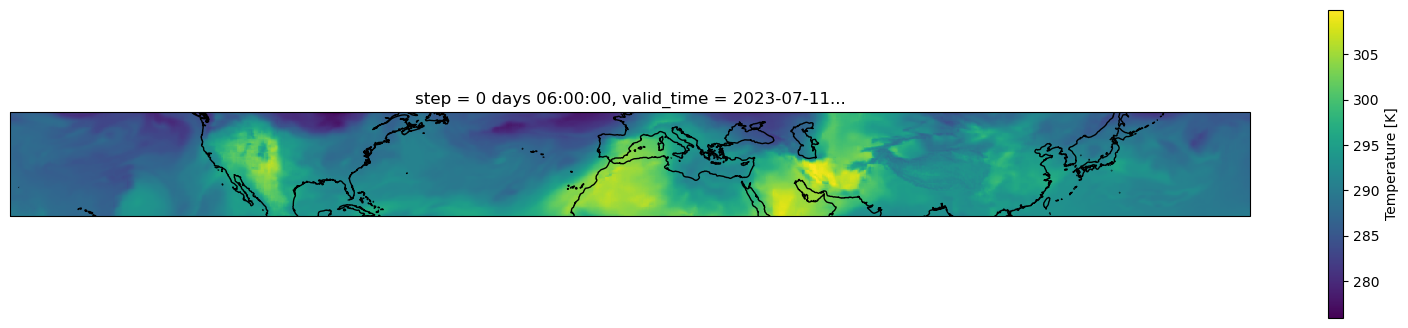

In [13]:
#Map of Surface Temperature at step 0 days, 06:00:00
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-180, 180, 20, 50])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-');
ds.t.sel(isobaricInhPa=850,step=ds.step[0]).plot()

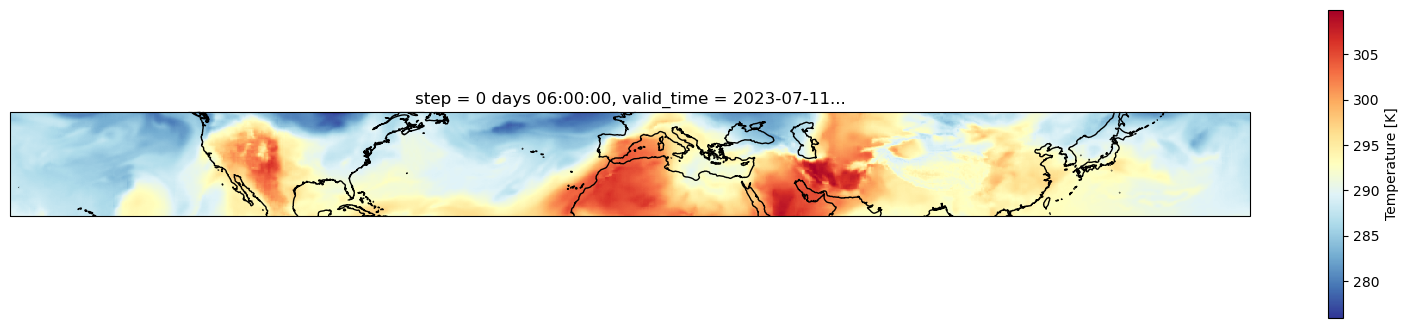

In [55]:
#Map of temperature at step 0: 0 days 06:00:00, different color scheme
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

####--------------------------------------
# Create a figure instance
fig = plt.figure(figsize=(20,4))

# map and data projection are both in rectangular grid
map_projection = ccrs.PlateCarree()

ax = plt.axes(projection=map_projection)

p = ds.t.sel(isobaricInhPa=850,step=ds.step[0]).plot(
    ax=ax,
    transform=ccrs.PlateCarree(),  # this is important!
    cmap='RdYlBu_r'
)

ax.add_feature(cfeature.COASTLINE, linestyle='-');

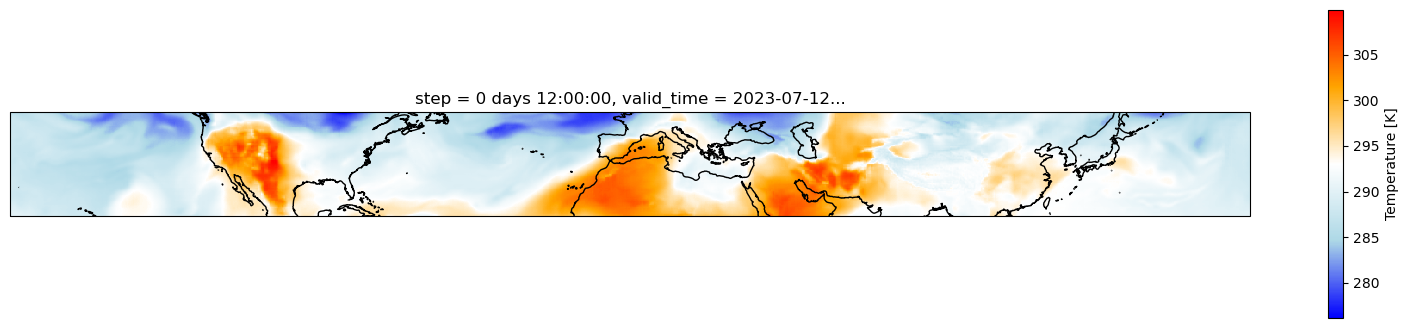

In [25]:
#Map of temperature at step 2: 0 days 12:00:00
import matplotlib.colors as colors
#-- Color schemes
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['blue', 'lightblue', 'white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-180, 180, 20, 50])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-');
ds.t.sel(isobaricInhPa=850,step=ds.step[1]).plot( cmap=cmap);

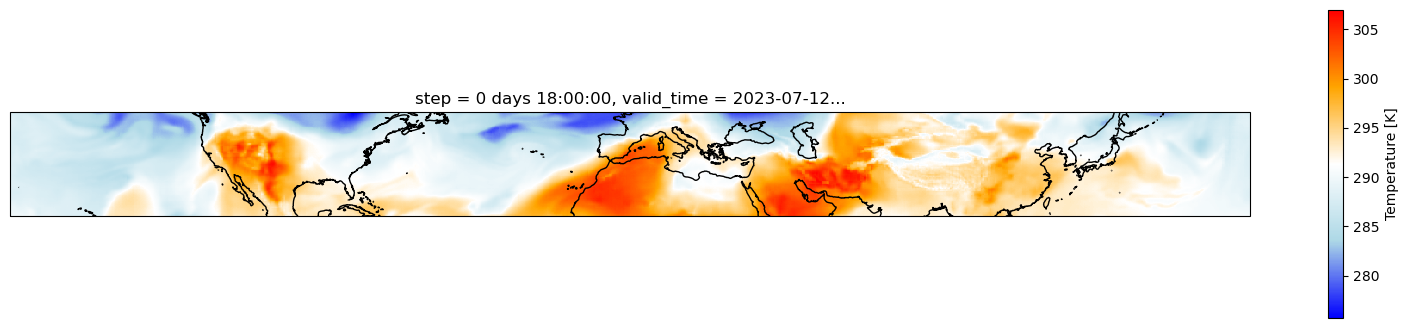

In [26]:
#Map of temperature at step 2: 0 days 18:00:00
import matplotlib.colors as colors
#-- Color schemes
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['blue', 'lightblue', 'white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-180, 180, 20, 50])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-');
ds.t.sel(isobaricInhPa=850,step=ds.step[2]).plot( cmap=cmap);

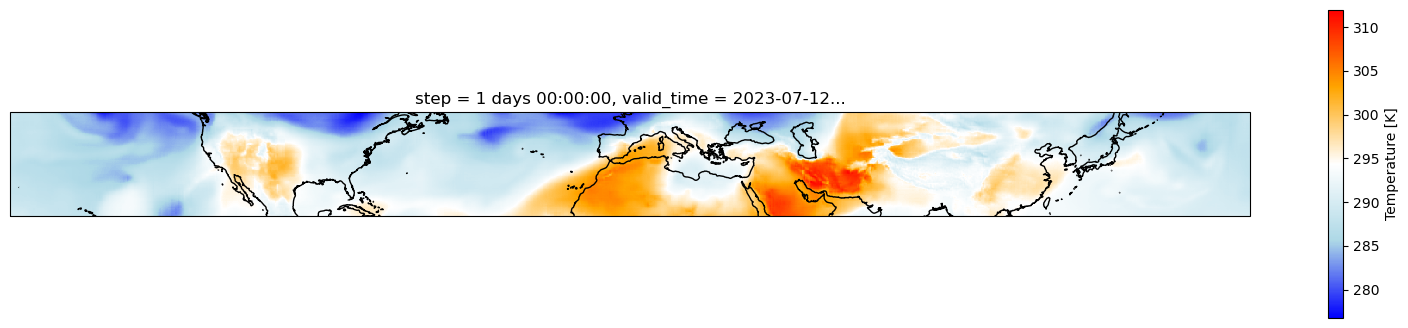

In [27]:
#Map of temperature at step 3: 1 days 00:00:00, different color scheme
import matplotlib.colors as colors
#-- Color schemes
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['blue', 'lightblue', 'white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-180, 180, 20, 50])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-');
ds.t.sel(isobaricInhPa=850,step=ds.step[3]).plot( cmap=cmap);

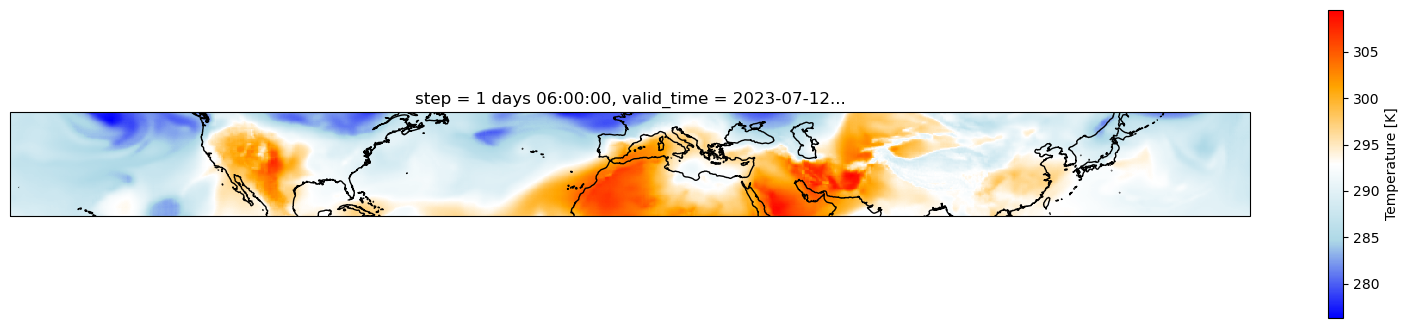

In [28]:
#Map of temperature at step 4: 1 days 06:00:00, different color scheme
import matplotlib.colors as colors
#-- Color schemes
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['blue', 'lightblue', 'white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-180, 180, 20, 50])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-');
ds.t.sel(isobaricInhPa=850,step=ds.step[4]).plot( cmap=cmap);

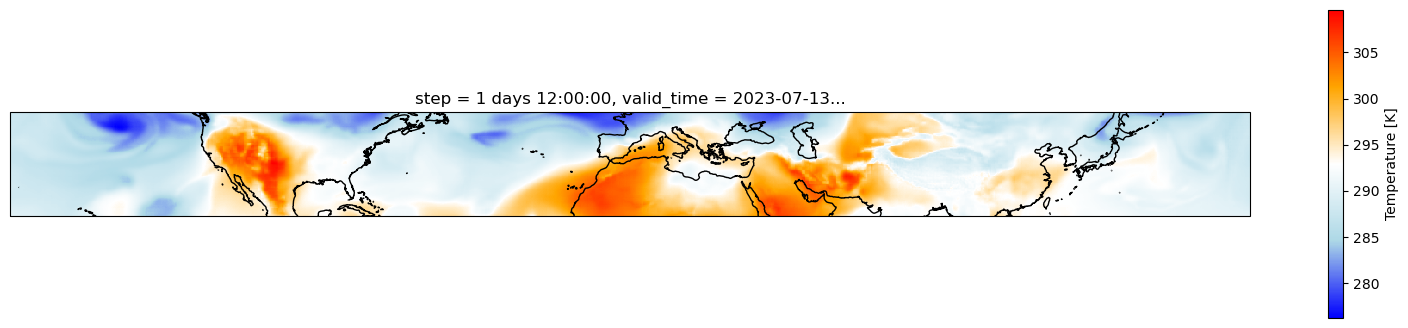

In [35]:
#Map of temperature at step 5: 1 days 12:00:00, different color scheme
import matplotlib.colors as colors
#-- Color schemes
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['blue', 'lightblue', 'white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-180, 180, 20, 50])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-');
ds.t.sel(isobaricInhPa=850,step=ds.step[5]).plot( cmap=cmap);

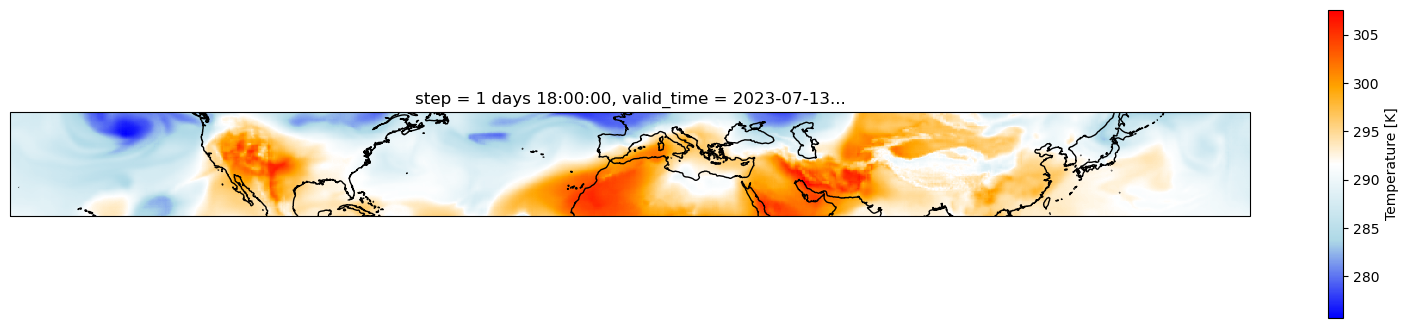

In [36]:
#Map of temperature at step 6: 1 days 18:00:00, different color scheme
import matplotlib.colors as colors
#-- Color schemes
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['blue', 'lightblue', 'white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-180, 180, 20, 50])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-');
ds.t.sel(isobaricInhPa=850,step=ds.step[6]).plot( cmap=cmap);

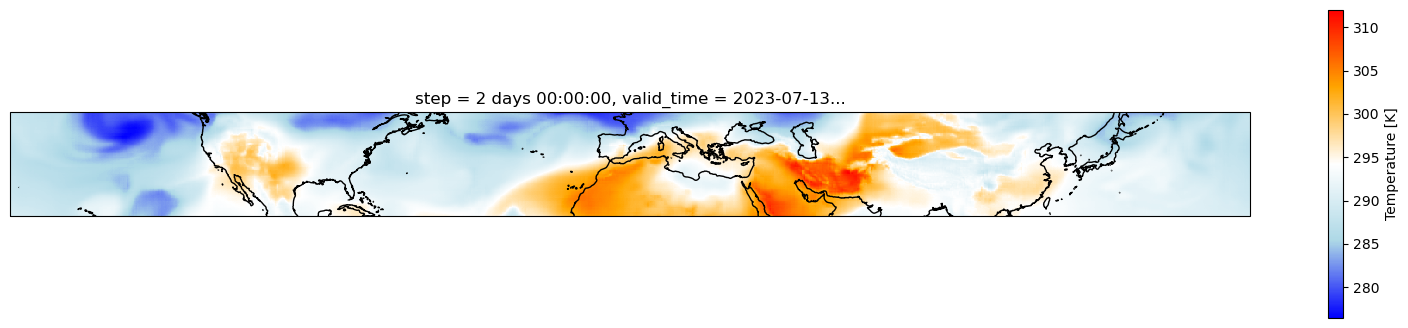

In [37]:
#Map of temperature at step 7: 2 days 00:00:00, different color scheme
import matplotlib.colors as colors
#-- Color schemes
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['blue', 'lightblue', 'white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-180, 180, 20, 50])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-');
ds.t.sel(isobaricInhPa=850,step=ds.step[7]).plot( cmap=cmap);

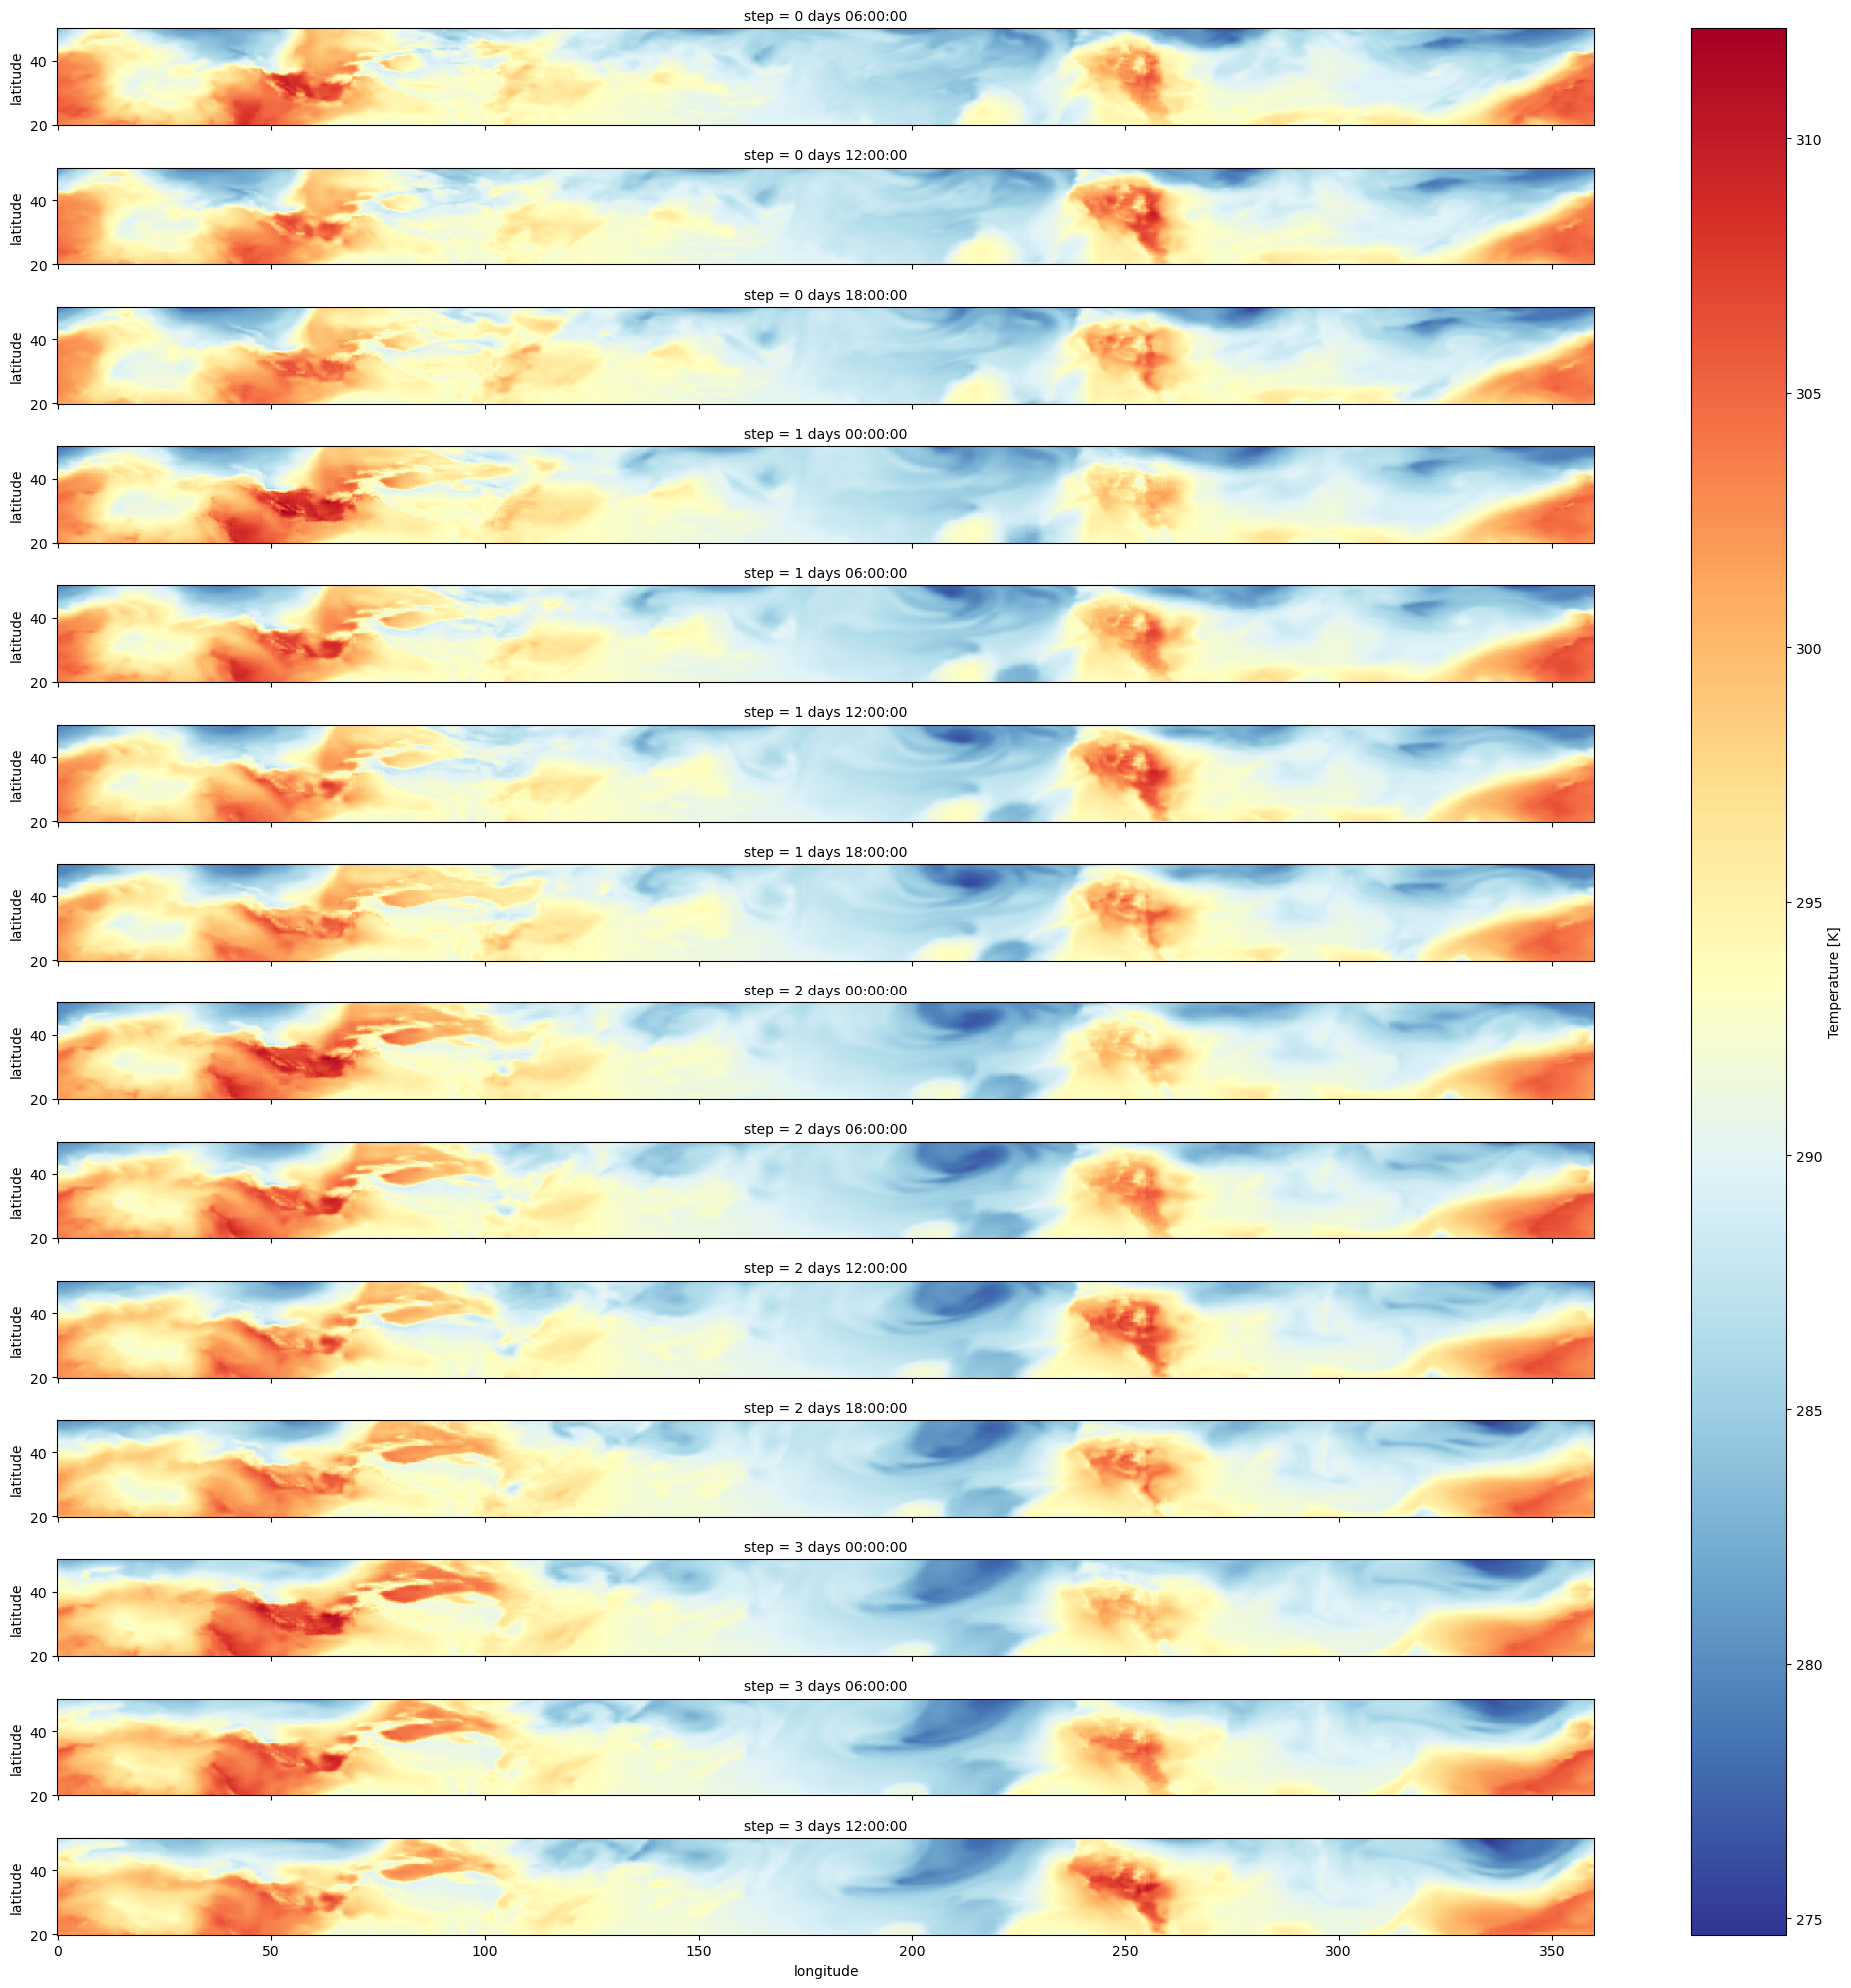

In [32]:
#Quick Plot of Surface Temperature At All Steps - add coast line not working
ds.t.sel(isobaricInhPa=850).plot(col='step', col_wrap=1, cmap='RdYlBu_r', figsize=(20, 20))

In [24]:
from glob import glob
all_files=sorted(glob('/scratch2/mfeldmann/seminar_mars/HW_EU*'))

Frozen({'longitude': 1440, 'latitude': 121, 'step': 14, 'isobaricInhPa': 2})


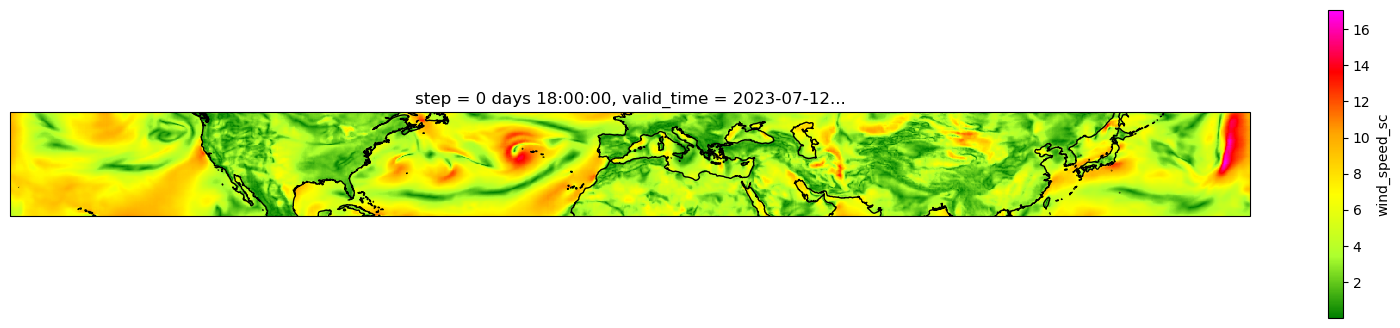

In [78]:
# Wind speed for step 0 18:00:00 hours
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['green','greenyellow','yellow','orange','red','magenta'])
print(ds.dims)
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-180, 180, 20, 50])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-');
ds.wind_speed_sc.sel(step=ds.step[2]).plot(cmap=cmap)

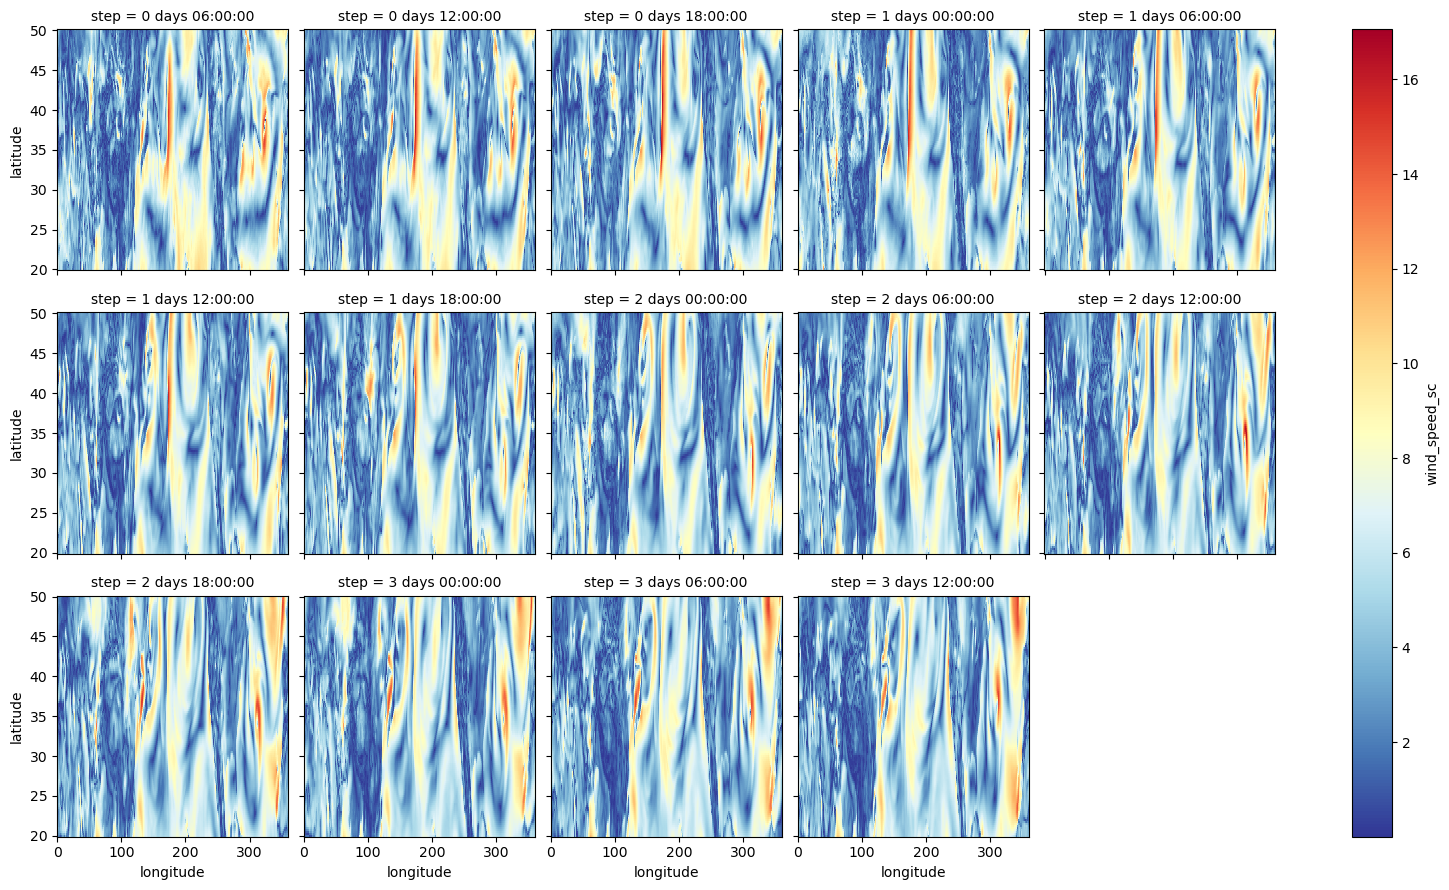

In [79]:
#Computation of Surface Wind Speed
ds=ds.assign(wind_speed_sc=lambda ds: (ds.u10**2 + ds.v10**2)**0.5 )
ds.wind_speed_sc

#Plotting time evolution of wind speed - not working
ds.wind_speed_sc.plot( col='step', col_wrap=5,cmap='RdYlBu_r')
ax.add_feature(cfeature.COASTLINE, linestyle='-');

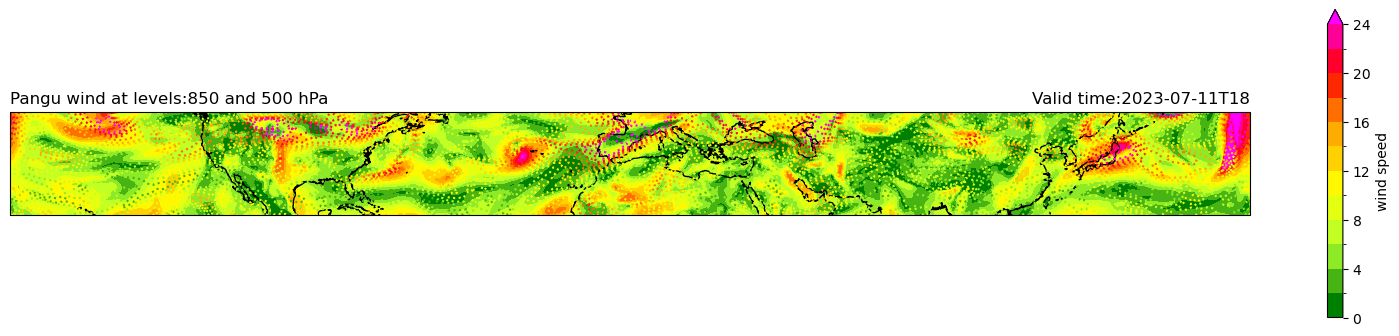

In [81]:
#Windspeed at 850 hPa (background shading) and 500 hPa (contours) superimposed
ds=ds.assign(wind_speed=lambda ds: (ds.u**2 + ds.v**2)**0.5 )

map_projection = ccrs.PlateCarree()

#data_projection = map_projection # map and data projection are both in rectangular grid

fig = plt.figure(figsize=(20,4))
ax = plt.axes(projection=map_projection)

T_levels=np.arange(0,25,2)

# Plotting temperature contours
# xarray wrapper for matplotlib contourf
ds.wind_speed.sel(isobaricInhPa=850,step=ds.step[2]).squeeze().plot.contourf(ax=ax, transform=map_projection, levels=T_levels, 
                                           vmin=0, vmax=40, # sets bounds of the colour bar, 
                                                            # specially important for multiple plots 
                                           cmap=cmap, 
                                           cbar_kwargs=dict( # controlling colour bar params
                                               label='wind speed',
                                               # ticks= np.arange(0,112,10) # uncomment to set custom ticks
                                               # shrink=0.8 # to control size
                                                          )
                                          )


# Plotting moisture contours
# xarray wrapper for matplotlib contour
ds.wind_speed.sel(isobaricInhPa=500,step=ds.step[2]).squeeze().plot.contour(levels=np.arange(0,25,2), cmap=cmap, linestyles='dotted',)

ax.add_feature(cfeature.COASTLINE, linestyle='-')
# transform means which projection our dataset is in.
# data we use here is by default in PlateCarree(lat, lon)

# setting the title
valid_time = np.datetime_as_string(fixed_time,unit='h')#.strftime('%Y-%m-%d')
ax.set_title('') # to supress xarray auto-title
ax.set_title('Valid time:{}'.format(valid_time), loc='right');
ax.set_title('Pangu wind at levels:{}'.format('850 and 500 hPa'), loc='left');

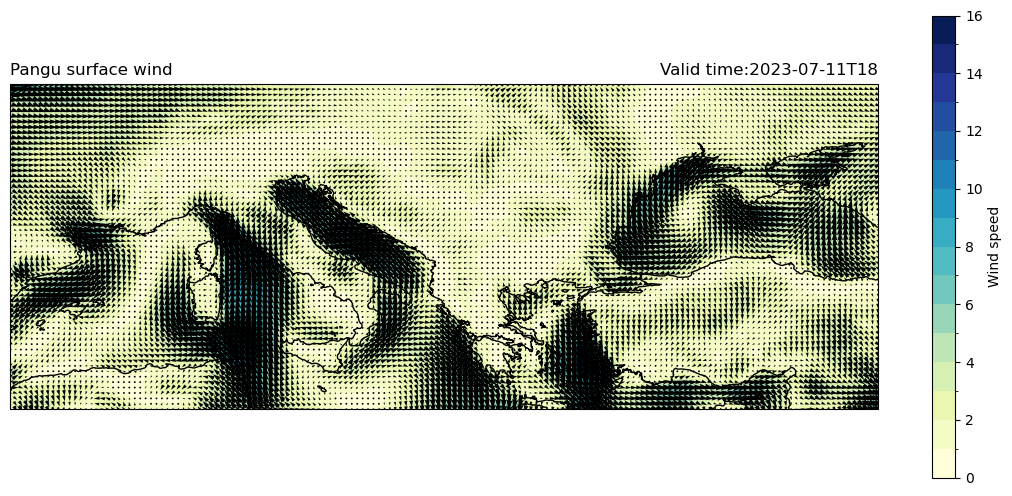

In [74]:
#Surface Wind Speed - not working
map_projection = ccrs.PlateCarree()

#data_projection = map_projection # map and data projection are both in rectangular grid

fig = plt.figure(figsize=(14,6))
ax = plt.axes(projection=map_projection)

V_levels=np.arange(0,17,1)

# Plotting temperature contours
# xarray wrapper for matplotlib contourf
ds.wind_speed_sc.sel(step=ds.step[4],longitude=slice(-10,40),latitude=slice(70,35)).squeeze().plot.contourf(ax=ax, transform=map_projection, 
                        levels=V_levels,vmin=0, vmax=30, # sets bounds of the colour bar, 
                        cmap='YlGnBu',cbar_kwargs=dict( # controlling colour bar params
                        label='Wind speed',# ticks= np.arange(0,112,10) # uncomment to set custom ticks
                                               # shrink=0.8 # to control size 
                                               ) )

# Plotting wind vectors
# xarray wrapper for matplotlib quiver
ds.sel(step=ds.step[4],longitude=slice(-10,40),latitude=slice(70,35)).plot.quiver(x='longitude', y='latitude', u='u10', v='v10',scale=400)


ax.add_feature(cfeature.COASTLINE, linestyle='-')
# transform means which projection our dataset is in.
# data we use here is by default in PlateCarree(lat, lon)

# setting the title
valid_time = np.datetime_as_string(fixed_time,unit='h')#.strftime('%Y-%m-%d')
ax.set_title('') # to supress xarray auto-title
ax.set_title('Valid time:{}'.format(valid_time), loc='right');
ax.set_title('Pangu surface wind', loc='left');